In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    auc
)

In [2]:
df = pd.read_csv("Network_logs.csv")
df.head()

,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,192.168.142.55,42.156.67.167,80,FTP,UDP,2369,curl/7.68.0,Success,0,Normal
1,53.39.165.18,94.60.242.119,135,SMTP,UDP,1536,Wget/1.20.3,Failure,1,BotAttack
2,192.168.127.91,7.10.192.3,21,SMTP,TCP,1183,Wget/1.20.3,Success,0,Normal
3,192.168.30.40,130.169.82.211,25,HTTPS,TCP,666,Mozilla/5.0,Success,0,Normal
4,192.168.43.179,35.140.102.220,22,FTP,TCP,2821,Mozilla/5.0,Success,0,Normal


DATA ANALYSIS

In [3]:
df.isnull().sum()

Source_IP         0
Destination_IP    0
Port              0
Request_Type      0
Protocol          0
Payload_Size      0
User_Agent        0
Status            0
Intrusion         0
Scan_Type         0
dtype: int64

In [4]:
df.dtypes

Source_IP         object
Destination_IP    object
Port               int64
Request_Type      object
Protocol          object
Payload_Size       int64
User_Agent        object
Status            object
Intrusion          int64
Scan_Type         object
dtype: object

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8846 entries, 0 to 8845
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Source_IP       8846 non-null   object
 1   Destination_IP  8846 non-null   object
 2   Port            8846 non-null   int64 
 3   Request_Type    8846 non-null   object
 4   Protocol        8846 non-null   object
 5   Payload_Size    8846 non-null   int64 
 6   User_Agent      8846 non-null   object
 7   Status          8846 non-null   object
 8   Intrusion       8846 non-null   int64 
 9   Scan_Type       8846 non-null   object
dtypes: int64(3), object(7)
memory usage: 691.2+ KB


,Port,Payload_Size,Intrusion
count,8846.000000,8846.000000,8846.000000
mean,887.127741,1598.762831,0.095636
std,4042.073308,915.615023,0.294109
min,21.000000,0.000000,0.000000
25%,22.000000,836.250000,0.000000
50%,53.000000,1580.000000,0.000000
75%,80.000000,2326.000000,0.000000
max,31337.000000,4997.000000,1.000000


In [6]:
df.columns

Index(['Source_IP', 'Destination_IP', 'Port', 'Request_Type', 'Protocol',
       'Payload_Size', 'User_Agent', 'Status', 'Intrusion', 'Scan_Type'],
      dtype='object')

In [7]:
df["Scan_Type"].value_counts()

Scan_Type
Normal       8000
BotAttack     478
PortScan      368
Name: count, dtype: int64

DATA PREPROCESSING

In [8]:
df.head()

,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,192.168.142.55,42.156.67.167,80,FTP,UDP,2369,curl/7.68.0,Success,0,Normal
1,53.39.165.18,94.60.242.119,135,SMTP,UDP,1536,Wget/1.20.3,Failure,1,BotAttack
2,192.168.127.91,7.10.192.3,21,SMTP,TCP,1183,Wget/1.20.3,Success,0,Normal
3,192.168.30.40,130.169.82.211,25,HTTPS,TCP,666,Mozilla/5.0,Success,0,Normal
4,192.168.43.179,35.140.102.220,22,FTP,TCP,2821,Mozilla/5.0,Success,0,Normal


In [9]:
df = df.drop(["User_Agent","Source_IP","Destination_IP"],axis=1)
df.head()

,Port,Request_Type,Protocol,Payload_Size,Status,Intrusion,Scan_Type
0,80,FTP,UDP,2369,Success,0,Normal
1,135,SMTP,UDP,1536,Failure,1,BotAttack
2,21,SMTP,TCP,1183,Success,0,Normal
3,25,HTTPS,TCP,666,Success,0,Normal
4,22,FTP,TCP,2821,Success,0,Normal


In [10]:
# Define the categorical columns to encode
categorical_columns = ["Request_Type", "Protocol", "Status", "Scan_Type"]

# Make a copy of the original DataFrame
df_encoded = df.copy()

# Apply Label Encoding to each column separately
for col in categorical_columns:
    encoder = LabelEncoder()
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

In [11]:
df_encoded.head()

,Port,Request_Type,Protocol,Payload_Size,Status,Intrusion,Scan_Type
0,80,1,2,2369,1,0,1
1,135,4,2,1536,0,1,0
2,21,4,1,1183,1,0,1
3,25,3,1,666,1,0,1
4,22,1,1,2821,1,0,1


In [12]:
X = df_encoded.drop("Scan_Type",axis=1)
y = df_encoded["Scan_Type"]

In [13]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

SPLITTING THE DATA

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=42)

MODEL IMPLEMETATION

In [15]:
# Step 6: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune n_neighbors
knn.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = knn.predict(X_test)

EVALUATION

BASIC METRICS

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9968354430379747
Precision (macro): 0.9773462783171522
Recall (macro): 0.9779874213836478
F1 Score (macro): 0.9768925930465334

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97       106
           1       1.00      1.00      1.00      2010
           2       0.93      1.00      0.96        96

    accuracy                           1.00      2212
   macro avg       0.98      0.98      0.98      2212
weighted avg       1.00      1.00      1.00      2212



CONFUSION MATRIX

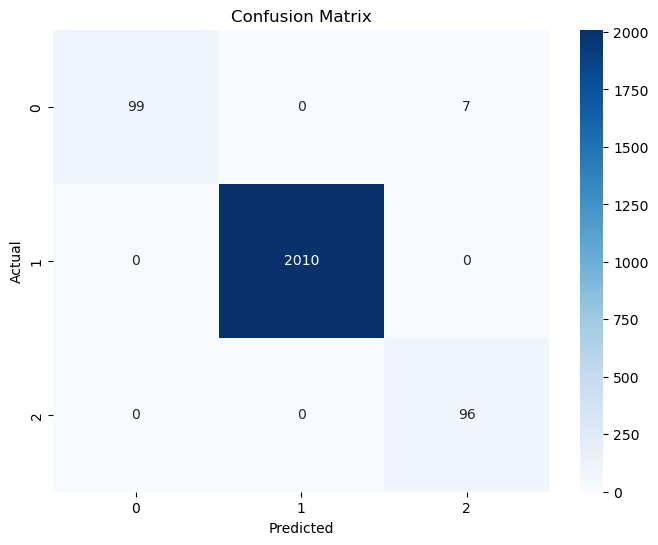

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()